In [179]:
import numpy as np
import pandas as pd
import math,sys

sys.path.append(sys.path[0] + '/../')

from imp import reload
import correlations as crlt
crlt=reload(crlt)

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (12,12)

import itertools


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy.optimize import curve_fit


In [95]:
def LMSQ(x,y):
    n   = len(x)
    sx  = np.sum(x)
    sy  = np.sum(y)
    sxx = np.dot(x,x)
    sxy = np.dot(x,y)
    syy = np.dot(y,y)
    
    denom  = (n*sxx-sx*sx)
    b      = (n*sxy - sx*sy)/denom
    a      = (sy-b*sx)/n
    estim  = np.array([a,b],dtype=np.float)

    sigma2 = syy + n*a*a + b*b*sxx + 2*a*b*sx - 2*a*sy - 2*b*sxy
    cov    = sigma2 / denom * np.array([[sxx,-sx],[-sx,n]],dtype=np.float)

    return estim,cov

def doubledecay(x,d0,d1,a,b):
    return a**2/(a**2 + b**2) * np.exp(-d0 * x) + b**2/(a**2 + b**2) * np.exp(-d1*x)

def doubledecayLIN(x,d0,d1,a):
    return a * np.exp(-d0 * x) + (1-a) * np.exp(-d1*x)

def decayInterp(a):
    #return 1/np.log(.3) + (1/np.log(.9) - 1/np.log(.3)) * a
    return 4*a
    
def doubledecayInterp(x,d0,d1,a):
    pd0 = decayInterp(.5 * (1 + np.tanh(d0)))
    pd1 = decayInterp(.5 * (1 + np.tanh(d1)))
    pa  = .5 * (1 + np.tanh(a))
    return pa * np.exp(-pd0 * x) + (1-pa) * np.exp(-pd1 * x)

def ddInterpParams(d0,d1,a):
    pd0 = decayInterp(.5 * (1 + np.tanh(d0)))
    pd1 = decayInterp(.5 * (1 + np.tanh(d1)))
    pa  = .5 * (1 + np.tanh(a))
    return np.array([pd0,pd1,pa])

def doubledecayInterpNaturalParams(x,d0,d1,a):
    return a * np.exp(-d0*x) + (1-a)*np.exp(-d1*x)

In [172]:
eigenvalues    = (.3,.9)
theta          = (0.0,0.3)
noiseamplitude = (0.6,0.6)

alpha          = 0.6
fitvalues = list()
#@interact
#def plotAlphaChange(alpha = (0,1,.1)):
for alpha in np.linspace(0,1,5001):
    fitvalues.append(crlt.GetCorrelation(alpha = alpha,eigenvalue0 = eigenvalues[0],eigenvalue1 = eigenvalues[1], theta0 = theta[0], theta1 = theta[1], noiseamplitude0 = noiseamplitude[0], noiseamplitude1= noiseamplitude[1], fit = True,plot = False))
    print('{:.5f} {:7.3f} {:7.3f} {:.3f} {:7.3f} {:7.3f} {:.3f}'.format(alpha,*fitvalues[-1]))

fitvalues = np.array(fitvalues)
#y = np.linspace(0,maxtreedepth**2,num=101)
#plt.plot(y,doubledecayInterp(y,.3,.7,.3,10))

0.00000   3.389   0.211 0.625   1.209   0.105 0.723
0.00020   3.380   0.211 0.627   1.209   0.105 0.724
0.00040   3.372   0.211 0.629   1.209   0.105 0.726
0.00060   3.364   0.211 0.631   1.209   0.105 0.728
0.00080   3.355   0.211 0.633   1.209   0.105 0.730
0.00100   3.347   0.211 0.635   1.209   0.105 0.732
0.00120   3.339   0.211 0.638   1.209   0.105 0.734
0.00140   3.332   0.211 0.640   1.209   0.105 0.736
0.00160   3.324   0.211 0.642   1.209   0.105 0.738
0.00180   3.316   0.211 0.644   1.209   0.105 0.740
0.00200   3.308   0.211 0.646   1.209   0.105 0.742
0.00220   3.301   0.211 0.648   1.209   0.105 0.744
0.00240   3.293   0.211 0.650   1.209   0.105 0.746
0.00260   3.286   0.211 0.652   1.209   0.105 0.748
0.00280   3.278   0.211 0.654   1.209   0.105 0.750
0.00300   3.271   0.211 0.657   1.209   0.105 0.751
0.00320   3.264   0.211 0.659   1.209   0.105 0.753
0.00340   3.257   0.211 0.661   1.209   0.105 0.755
0.00360   3.250   0.211 0.663   1.209   0.105 0.757
0.00380   3.

0.03440   2.961   0.211 0.950   1.209   0.105 0.990
0.03460   2.948   0.211 0.952   1.209   0.105 0.991
0.03480   2.934   0.211 0.953   1.209   0.105 0.992
0.03500   2.922   0.211 0.954   1.209   0.105 0.992
0.03520   2.909   0.211 0.955   1.209   0.105 0.993
0.03540   2.897   0.211 0.956   1.209   0.105 0.994
0.03560   2.885   0.211 0.958   1.209   0.105 0.994
0.03580   2.874   0.211 0.959   1.209   0.105 0.995
0.03600   2.862   0.211 0.960   1.209   0.105 0.996
0.03620   2.851   0.211 0.961   1.209   0.105 0.996
0.03640   2.841   0.211 0.962   1.209   0.105 0.997
0.03660   2.830   0.211 0.963   1.209   0.105 0.997
0.03680   2.820   0.211 0.964   1.209   0.105 0.998
0.03700   2.810   0.211 0.965   1.209   0.105 0.999
0.03720   2.800   0.211 0.966   1.209   0.105 0.999
0.03740   2.790   0.211 0.967   1.209   0.105 1.000
0.03760   2.781   0.211 0.968   1.209   0.105 1.000
0.03780   2.772   0.211 0.969   1.209   0.105 1.001
0.03800   2.763   0.211 0.970   1.209   0.105 1.001
0.03820   2.

0.06880   1.425   0.211 0.932   1.209   0.105 0.889
0.06900   1.424   0.211 0.930   1.209   0.105 0.888
0.06920   1.424   0.211 0.929   1.209   0.105 0.886
0.06940   1.423   0.211 0.928   1.209   0.105 0.884
0.06960   1.423   0.211 0.926   1.209   0.105 0.882
0.06980   1.422   0.211 0.925   1.209   0.105 0.881
0.07000   1.421   0.211 0.923   1.209   0.105 0.879
0.07020   1.421   0.211 0.922   1.209   0.105 0.877
0.07040   1.420   0.211 0.920   1.209   0.105 0.875
0.07060   1.420   0.211 0.919   1.209   0.105 0.873
0.07080   1.419   0.211 0.918   1.209   0.105 0.872
0.07100   1.419   0.211 0.916   1.209   0.105 0.870
0.07120   1.418   0.211 0.915   1.209   0.105 0.868
0.07140   1.418   0.211 0.913   1.209   0.105 0.866
0.07160   1.417   0.211 0.912   1.209   0.105 0.864
0.07180   1.417   0.211 0.910   1.209   0.105 0.863
0.07200   1.416   0.211 0.909   1.209   0.105 0.861
0.07220   1.416   0.211 0.907   1.209   0.105 0.859
0.07240   1.415   0.211 0.906   1.209   0.105 0.857
0.07260   1.

0.10320   1.373   0.211 0.619   1.209   0.105 0.544
0.10340   1.372   0.211 0.617   1.209   0.105 0.542
0.10360   1.372   0.211 0.615   1.209   0.105 0.540
0.10380   1.372   0.211 0.613   1.209   0.105 0.539
0.10400   1.372   0.211 0.611   1.209   0.105 0.537
0.10420   1.372   0.211 0.609   1.209   0.105 0.535
0.10440   1.372   0.211 0.607   1.209   0.105 0.533
0.10460   1.371   0.211 0.606   1.209   0.105 0.531
0.10480   1.371   0.211 0.604   1.209   0.105 0.529
0.10500   1.371   0.211 0.602   1.209   0.105 0.527
0.10520   1.371   0.211 0.600   1.209   0.105 0.525
0.10540   1.371   0.211 0.598   1.209   0.105 0.523
0.10560   1.371   0.211 0.596   1.209   0.105 0.521
0.10580   1.370   0.211 0.594   1.209   0.105 0.520
0.10600   1.370   0.211 0.592   1.209   0.105 0.518
0.10620   1.370   0.211 0.591   1.209   0.105 0.516
0.10640   1.370   0.211 0.589   1.209   0.105 0.514
0.10660   1.370   0.211 0.587   1.209   0.105 0.512
0.10680   1.370   0.211 0.585   1.209   0.105 0.510
0.10700   1.

0.13500   1.353   0.211 0.360   1.209   0.105 0.293
0.13520   1.352   0.211 0.358   1.209   0.105 0.291
0.13540   1.352   0.211 0.357   1.209   0.105 0.290
0.13560   1.352   0.211 0.356   1.209   0.105 0.289
0.13580   1.352   0.211 0.354   1.209   0.105 0.288
0.13600   1.352   0.211 0.353   1.209   0.105 0.287
0.13620   1.352   0.211 0.352   1.209   0.105 0.285
0.13640   1.352   0.211 0.350   1.209   0.105 0.284
0.13660   1.352   0.211 0.349   1.209   0.105 0.283
0.13680   1.352   0.211 0.348   1.209   0.105 0.282
0.13700   1.352   0.211 0.346   1.209   0.105 0.280
0.13720   1.352   0.211 0.345   1.209   0.105 0.279
0.13740   1.351   0.211 0.344   1.209   0.105 0.278
0.13760   1.351   0.211 0.343   1.209   0.105 0.277
0.13780   1.351   0.211 0.341   1.209   0.105 0.276
0.13800   1.351   0.211 0.340   1.209   0.105 0.275
0.13820   1.351   0.211 0.339   1.209   0.105 0.273
0.13840   1.351   0.211 0.337   1.209   0.105 0.272
0.13860   1.351   0.211 0.336   1.209   0.105 0.271
0.13880   1.

0.16960   1.339   0.211 0.180   1.209   0.105 0.133
0.16980   1.338   0.211 0.179   1.209   0.105 0.132
0.17000   1.338   0.211 0.178   1.209   0.105 0.132
0.17020   1.338   0.211 0.177   1.209   0.105 0.131
0.17040   1.338   0.211 0.176   1.209   0.105 0.130
0.17060   1.338   0.211 0.176   1.209   0.105 0.130
0.17080   1.338   0.211 0.175   1.209   0.105 0.129
0.17100   1.338   0.211 0.174   1.209   0.105 0.128
0.17120   1.338   0.211 0.173   1.209   0.105 0.128
0.17140   1.338   0.211 0.173   1.209   0.105 0.127
0.17160   1.338   0.211 0.172   1.209   0.105 0.126
0.17180   1.338   0.211 0.171   1.209   0.105 0.126
0.17200   1.338   0.211 0.170   1.209   0.105 0.125
0.17220   1.338   0.211 0.170   1.209   0.105 0.124
0.17240   1.338   0.211 0.169   1.209   0.105 0.124
0.17260   1.338   0.211 0.168   1.209   0.105 0.123
0.17280   1.337   0.211 0.167   1.209   0.105 0.123
0.17300   1.337   0.211 0.167   1.209   0.105 0.122
0.17320   1.337   0.211 0.166   1.209   0.105 0.121
0.17340   1.

0.20300   1.328   0.211 0.077   1.209   0.105 0.051
0.20320   1.328   0.211 0.077   1.209   0.105 0.050
0.20340   1.328   0.211 0.076   1.209   0.105 0.050
0.20360   1.328   0.211 0.076   1.209   0.105 0.050
0.20380   1.328   0.211 0.075   1.209   0.105 0.049
0.20400   1.328   0.211 0.075   1.209   0.105 0.049
0.20420   1.328   0.211 0.074   1.209   0.105 0.049
0.20440   1.327   0.211 0.074   1.209   0.105 0.048
0.20460   1.327   0.211 0.073   1.209   0.105 0.048
0.20480   1.327   0.211 0.073   1.209   0.105 0.048
0.20500   1.327   0.211 0.072   1.209   0.105 0.047
0.20520   1.327   0.211 0.072   1.209   0.105 0.047
0.20540   1.327   0.211 0.071   1.209   0.105 0.047
0.20560   1.327   0.211 0.071   1.209   0.105 0.046
0.20580   1.327   0.211 0.071   1.209   0.105 0.046
0.20600   1.327   0.211 0.070   1.209   0.105 0.046
0.20620   1.327   0.211 0.070   1.209   0.105 0.045
0.20640   1.327   0.211 0.069   1.209   0.105 0.045
0.20660   1.327   0.211 0.069   1.209   0.105 0.045
0.20680   1.

0.23460   1.319   0.211 0.019   1.209   0.105 0.011
0.23480   1.319   0.211 0.019   1.209   0.105 0.010
0.23500   1.319   0.211 0.018   1.209   0.105 0.010
0.23520   1.318   0.211 0.018   1.209   0.105 0.010
0.23540   1.318   0.211 0.018   1.209   0.105 0.010
0.23560   1.318   0.211 0.018   1.209   0.105 0.010
0.23580   1.318   0.211 0.017   1.209   0.105 0.010
0.23600   1.318   0.211 0.017   1.209   0.105 0.009
0.23620   1.318   0.211 0.017   1.209   0.105 0.009
0.23640   1.318   0.211 0.016   1.209   0.105 0.009
0.23660   1.318   0.211 0.016   1.209   0.105 0.009
0.23680   1.318   0.211 0.016   1.209   0.105 0.009
0.23700   1.318   0.211 0.016   1.209   0.105 0.009
0.23720   1.318   0.211 0.015   1.209   0.105 0.008
0.23740   1.318   0.211 0.015   1.209   0.105 0.008
0.23760   1.318   0.211 0.015   1.209   0.105 0.008
0.23780   1.318   0.211 0.015   1.209   0.105 0.008
0.23800   1.318   0.211 0.014   1.209   0.105 0.008
0.23820   1.318   0.211 0.014   1.209   0.105 0.008
0.23840   1.

0.26700     nan   0.211 -0.015     nan   0.105 -0.006
0.26720     nan   0.211 -0.015     nan   0.105 -0.006
0.26740     nan   0.211 -0.016     nan   0.105 -0.006
0.26760     nan   0.211 -0.016     nan   0.105 -0.007
0.26780     nan   0.211 -0.016     nan   0.105 -0.007
0.26800     nan   0.211 -0.016     nan   0.105 -0.007
0.26820     nan   0.211 -0.016     nan   0.105 -0.007
0.26840     nan   0.211 -0.016     nan   0.105 -0.007
0.26860     nan   0.211 -0.016     nan   0.105 -0.007
0.26880     nan   0.211 -0.017     nan   0.105 -0.007
0.26900     nan   0.211 -0.017     nan   0.105 -0.007
0.26920     nan   0.211 -0.017     nan   0.105 -0.007
0.26940     nan   0.211 -0.017     nan   0.105 -0.007
0.26960     nan   0.211 -0.017     nan   0.105 -0.007
0.26980     nan   0.211 -0.017     nan   0.105 -0.007
0.27000     nan   0.211 -0.017     nan   0.105 -0.007
0.27020     nan   0.211 -0.018     nan   0.105 -0.007
0.27040     nan   0.211 -0.018     nan   0.105 -0.007
0.27060     nan   0.211 -0.0

0.29900     nan   0.211 -0.030     nan   0.105 -0.005
0.29920     nan   0.211 -0.031     nan   0.105 -0.005
0.29940     nan   0.211 -0.031     nan   0.105 -0.005
0.29960     nan   0.211 -0.031     nan   0.105 -0.005
0.29980     nan   0.211 -0.031     nan   0.105 -0.005
0.30000     nan   0.211 -0.031     nan   0.105 -0.005
0.30020     nan   0.211 -0.031     nan   0.105 -0.005
0.30040     nan   0.211 -0.031     nan   0.105 -0.005
0.30060     nan   0.211 -0.031     nan   0.105 -0.005
0.30080     nan   0.211 -0.031     nan   0.105 -0.005
0.30100     nan   0.211 -0.031     nan   0.105 -0.005
0.30120     nan   0.211 -0.031     nan   0.105 -0.005
0.30140     nan   0.211 -0.031     nan   0.105 -0.005
0.30160     nan   0.211 -0.031     nan   0.105 -0.005
0.30180     nan   0.211 -0.031     nan   0.105 -0.005
0.30200     nan   0.211 -0.031     nan   0.105 -0.004
0.30220     nan   0.211 -0.031     nan   0.105 -0.004
0.30240     nan   0.211 -0.031     nan   0.105 -0.004
0.30260     nan   0.211 -0.0

0.33020     nan   0.211 -0.029   1.209   0.105 0.011
0.33040     nan   0.211 -0.029   1.209   0.105 0.011
0.33060     nan   0.211 -0.029   1.209   0.105 0.012
0.33080     nan   0.211 -0.029   1.209   0.105 0.012
0.33100     nan   0.211 -0.029   1.209   0.105 0.012
0.33120     nan   0.211 -0.029   1.209   0.105 0.012
0.33140     nan   0.211 -0.029   1.209   0.105 0.012
0.33160     nan   0.211 -0.029   1.209   0.105 0.012
0.33180     nan   0.211 -0.029   1.209   0.105 0.013
0.33200     nan   0.211 -0.029   1.209   0.105 0.013
0.33220     nan   0.211 -0.029   1.209   0.105 0.013
0.33240     nan   0.211 -0.029   1.209   0.105 0.013
0.33260     nan   0.211 -0.029   1.209   0.105 0.013
0.33280     nan   0.211 -0.029   1.209   0.105 0.013
0.33300     nan   0.211 -0.029   1.209   0.105 0.014
0.33320     nan   0.211 -0.029   1.209   0.105 0.014
0.33340     nan   0.211 -0.028   1.209   0.105 0.014
0.33360     nan   0.211 -0.028   1.209   0.105 0.014
0.33380     nan   0.211 -0.028   1.209   0.105

0.36160     nan   0.211 -0.011   1.209   0.105 0.046
0.36180     nan   0.211 -0.011   1.209   0.105 0.046
0.36200     nan   0.211 -0.010   1.209   0.105 0.046
0.36220     nan   0.211 -0.010   1.209   0.105 0.047
0.36240     nan   0.211 -0.010   1.209   0.105 0.047
0.36260     nan   0.211 -0.010   1.209   0.105 0.047
0.36280     nan   0.211 -0.010   1.209   0.105 0.048
0.36300     nan   0.211 -0.010   1.209   0.105 0.048
0.36320     nan   0.211 -0.009   1.209   0.105 0.048
0.36340     nan   0.211 -0.009   1.209   0.105 0.048
0.36360     nan   0.211 -0.009   1.209   0.105 0.049
0.36380     nan   0.211 -0.009   1.209   0.105 0.049
0.36400     nan   0.211 -0.009   1.209   0.105 0.049
0.36420     nan   0.211 -0.008   1.209   0.105 0.050
0.36440     nan   0.211 -0.008   1.209   0.105 0.050
0.36460     nan   0.211 -0.008   1.209   0.105 0.050
0.36480     nan   0.211 -0.008   1.209   0.105 0.051
0.36500     nan   0.211 -0.008   1.209   0.105 0.051
0.36520     nan   0.211 -0.007   1.209   0.105

0.39340     nan   0.211 0.033   1.209   0.105 0.106
0.39360     nan   0.211 0.033   1.209   0.105 0.106
0.39380     nan   0.211 0.033   1.209   0.105 0.107
0.39400     nan   0.211 0.034   1.209   0.105 0.107
0.39420     nan   0.211 0.034   1.209   0.105 0.108
0.39440     nan   0.211 0.034   1.209   0.105 0.108
0.39460     nan   0.211 0.035   1.209   0.105 0.109
0.39480     nan   0.211 0.035   1.209   0.105 0.109
0.39500     nan   0.211 0.036   1.209   0.105 0.110
0.39520     nan   0.211 0.036   1.209   0.105 0.110
0.39540     nan   0.211 0.036   1.209   0.105 0.111
0.39560     nan   0.211 0.037   1.209   0.105 0.111
0.39580     nan   0.211 0.037   1.209   0.105 0.112
0.39600     nan   0.211 0.038   1.209   0.105 0.112
0.39620     nan   0.211 0.038   1.209   0.105 0.113
0.39640     nan   0.211 0.038   1.209   0.105 0.113
0.39660     nan   0.211 0.039   1.209   0.105 0.114
0.39680     nan   0.211 0.039   1.209   0.105 0.114
0.39700     nan   0.211 0.040   1.209   0.105 0.115
0.39720     

0.42740     nan   0.211 0.123   1.209   0.105 0.214
0.42760     nan   0.211 0.123   1.209   0.105 0.214
0.42780     nan   0.211 0.124   1.209   0.105 0.215
0.42800     nan   0.211 0.125   1.209   0.105 0.216
0.42820     nan   0.211 0.125   1.209   0.105 0.217
0.42840     nan   0.211 0.126   1.209   0.105 0.218
0.42860     nan   0.211 0.127   1.209   0.105 0.218
0.42880     nan   0.211 0.128   1.209   0.105 0.219
0.42900     nan   0.211 0.128   1.209   0.105 0.220
0.42920     nan   0.211 0.129   1.209   0.105 0.221
0.42940     nan   0.211 0.130   1.209   0.105 0.222
0.42960     nan   0.211 0.131   1.209   0.105 0.223
0.42980     nan   0.211 0.131   1.209   0.105 0.223
0.43000     nan   0.211 0.132   1.209   0.105 0.224
0.43020     nan   0.211 0.133   1.209   0.105 0.225
0.43040     nan   0.211 0.134   1.209   0.105 0.226
0.43060     nan   0.211 0.134   1.209   0.105 0.227
0.43080     nan   0.211 0.135   1.209   0.105 0.228
0.43100     nan   0.211 0.136   1.209   0.105 0.229
0.43120     

0.46100     nan   0.211 0.288   1.209   0.105 0.393
0.46120     nan   0.211 0.289   1.209   0.105 0.394
0.46140     nan   0.211 0.290   1.209   0.105 0.395
0.46160     nan   0.211 0.292   1.209   0.105 0.397
0.46180     nan   0.211 0.293   1.209   0.105 0.398
0.46200     nan   0.211 0.294   1.209   0.105 0.399
0.46220     nan   0.211 0.296   1.209   0.105 0.401
0.46240     nan   0.211 0.297   1.209   0.105 0.402
0.46260     nan   0.211 0.298   1.209   0.105 0.403
0.46280     nan   0.211 0.300   1.209   0.105 0.405
0.46300     nan   0.211 0.301   1.209   0.105 0.406
0.46320     nan   0.211 0.302   1.209   0.105 0.408
0.46340     nan   0.211 0.304   1.209   0.105 0.409
0.46360     nan   0.211 0.305   1.209   0.105 0.410
0.46380     nan   0.211 0.306   1.209   0.105 0.412
0.46400     nan   0.211 0.308   1.209   0.105 0.413
0.46420     nan   0.211 0.309   1.209   0.105 0.415
0.46440     nan   0.211 0.310   1.209   0.105 0.416
0.46460     nan   0.211 0.312   1.209   0.105 0.417
0.46480     

0.49320   3.745   0.211 0.555   1.209   0.105 0.657
0.49340   3.732   0.211 0.557   1.209   0.105 0.659
0.49360   3.719   0.211 0.559   1.209   0.105 0.661
0.49380   3.707   0.211 0.561   1.209   0.105 0.663
0.49400   3.694   0.211 0.563   1.209   0.105 0.665
0.49420   3.682   0.211 0.565   1.209   0.105 0.667
0.49440   3.670   0.211 0.567   1.209   0.105 0.669
0.49460   3.658   0.211 0.569   1.209   0.105 0.671
0.49480   3.646   0.211 0.571   1.209   0.105 0.673
0.49500   3.635   0.211 0.573   1.209   0.105 0.675
0.49520   3.623   0.211 0.575   1.209   0.105 0.676
0.49540   3.612   0.211 0.577   1.209   0.105 0.678
0.49560   3.601   0.211 0.579   1.209   0.105 0.680
0.49580   3.590   0.211 0.581   1.209   0.105 0.682
0.49600   3.579   0.211 0.583   1.209   0.105 0.684
0.49620   3.568   0.211 0.585   1.209   0.105 0.686
0.49640   3.558   0.211 0.588   1.209   0.105 0.688
0.49660   3.547   0.211 0.590   1.209   0.105 0.690
0.49680   3.537   0.211 0.592   1.209   0.105 0.692
0.49700   3.

0.52580   2.720   0.211 0.887   1.209   0.105 0.946
0.52600   2.717   0.211 0.888   1.209   0.105 0.947
0.52620   2.714   0.211 0.890   1.209   0.105 0.949
0.52640   2.710   0.211 0.892   1.209   0.105 0.950
0.52660   2.707   0.211 0.893   1.209   0.105 0.951
0.52680   2.704   0.211 0.895   1.209   0.105 0.952
0.52700   2.701   0.211 0.897   1.209   0.105 0.954
0.52720   2.697   0.211 0.898   1.209   0.105 0.955
0.52740   5.113   0.211 0.900   1.209   0.105 0.956
0.52760   4.540   0.211 0.902   1.209   0.105 0.957
0.52780   4.281   0.211 0.903   1.209   0.105 0.958
0.52800   4.111   0.211 0.905   1.209   0.105 0.960
0.52820   3.984   0.211 0.906   1.209   0.105 0.961
0.52840   3.884   0.211 0.908   1.209   0.105 0.962
0.52860   3.800   0.211 0.910   1.209   0.105 0.963
0.52880   3.729   0.211 0.911   1.209   0.105 0.964
0.52900   3.666   0.211 0.913   1.209   0.105 0.965
0.52920   3.611   0.211 0.914   1.209   0.105 0.966
0.52940   3.561   0.211 0.916   1.209   0.105 0.967
0.52960   3.

0.55840   1.475   0.211 0.986   1.209   0.105 0.965
0.55860   1.473   0.211 0.985   1.209   0.105 0.964
0.55880   1.472   0.211 0.984   1.209   0.105 0.963
0.55900   1.470   0.211 0.983   1.209   0.105 0.962
0.55920   1.469   0.211 0.983   1.209   0.105 0.960
0.55940   1.467   0.211 0.982   1.209   0.105 0.959
0.55960   1.466   0.211 0.981   1.209   0.105 0.958
0.55980   1.464   0.211 0.980   1.209   0.105 0.957
0.56000   1.463   0.211 0.980   1.209   0.105 0.955
0.56020   1.462   0.211 0.979   1.209   0.105 0.954
0.56040   1.461   0.211 0.978   1.209   0.105 0.953
0.56060   1.459   0.211 0.977   1.209   0.105 0.952
0.56080   1.458   0.211 0.976   1.209   0.105 0.950
0.56100   1.457   0.211 0.976   1.209   0.105 0.949
0.56120   1.456   0.211 0.975   1.209   0.105 0.948
0.56140   1.455   0.211 0.974   1.209   0.105 0.946
0.56160   1.454   0.211 0.973   1.209   0.105 0.945
0.56180   1.453   0.211 0.972   1.209   0.105 0.944
0.56200   1.452   0.211 0.971   1.209   0.105 0.942
0.56220   1.

0.59280   1.382   0.211 0.720   1.209   0.105 0.649
0.59300   1.382   0.211 0.718   1.209   0.105 0.647
0.59320   1.382   0.211 0.716   1.209   0.105 0.645
0.59340   1.382   0.211 0.714   1.209   0.105 0.643
0.59360   1.382   0.211 0.712   1.209   0.105 0.640
0.59380   1.381   0.211 0.710   1.209   0.105 0.638
0.59400   1.381   0.211 0.708   1.209   0.105 0.636
0.59420   1.381   0.211 0.706   1.209   0.105 0.634
0.59440   1.381   0.211 0.704   1.209   0.105 0.632
0.59460   1.381   0.211 0.702   1.209   0.105 0.630
0.59480   1.380   0.211 0.700   1.209   0.105 0.628
0.59500   1.380   0.211 0.698   1.209   0.105 0.626
0.59520   1.380   0.211 0.696   1.209   0.105 0.624
0.59540   1.380   0.211 0.694   1.209   0.105 0.622
0.59560   1.380   0.211 0.692   1.209   0.105 0.620
0.59580   1.379   0.211 0.690   1.209   0.105 0.618
0.59600   1.379   0.211 0.688   1.209   0.105 0.616
0.59620   1.379   0.211 0.686   1.209   0.105 0.614
0.59640   1.379   0.211 0.684   1.209   0.105 0.612
0.59660   1.

0.62660   1.357   0.211 0.419   1.209   0.105 0.348
0.62680   1.357   0.211 0.417   1.209   0.105 0.347
0.62700   1.357   0.211 0.416   1.209   0.105 0.345
0.62720   1.357   0.211 0.414   1.209   0.105 0.344
0.62740   1.356   0.211 0.413   1.209   0.105 0.343
0.62760   1.356   0.211 0.411   1.209   0.105 0.341
0.62780   1.356   0.211 0.410   1.209   0.105 0.340
0.62800   1.356   0.211 0.408   1.209   0.105 0.338
0.62820   1.356   0.211 0.407   1.209   0.105 0.337
0.62840   1.356   0.211 0.406   1.209   0.105 0.336
0.62860   1.356   0.211 0.404   1.209   0.105 0.334
0.62880   1.356   0.211 0.403   1.209   0.105 0.333
0.62900   1.356   0.211 0.401   1.209   0.105 0.331
0.62920   1.356   0.211 0.400   1.209   0.105 0.330
0.62940   1.355   0.211 0.398   1.209   0.105 0.329
0.62960   1.355   0.211 0.397   1.209   0.105 0.327
0.62980   1.355   0.211 0.395   1.209   0.105 0.326
0.63000   1.355   0.211 0.394   1.209   0.105 0.325
0.63020   1.355   0.211 0.393   1.209   0.105 0.323
0.63040   1.

0.66080   1.342   0.211 0.217   1.209   0.105 0.165
0.66100   1.342   0.211 0.216   1.209   0.105 0.164
0.66120   1.342   0.211 0.215   1.209   0.105 0.163
0.66140   1.341   0.211 0.214   1.209   0.105 0.162
0.66160   1.341   0.211 0.213   1.209   0.105 0.161
0.66180   1.341   0.211 0.212   1.209   0.105 0.161
0.66200   1.341   0.211 0.211   1.209   0.105 0.160
0.66220   1.341   0.211 0.211   1.209   0.105 0.159
0.66240   1.341   0.211 0.210   1.209   0.105 0.158
0.66260   1.341   0.211 0.209   1.209   0.105 0.158
0.66280   1.341   0.211 0.208   1.209   0.105 0.157
0.66300   1.341   0.211 0.207   1.209   0.105 0.156
0.66320   1.341   0.211 0.206   1.209   0.105 0.155
0.66340   1.341   0.211 0.205   1.209   0.105 0.155
0.66360   1.341   0.211 0.204   1.209   0.105 0.154
0.66380   1.341   0.211 0.204   1.209   0.105 0.153
0.66400   1.341   0.211 0.203   1.209   0.105 0.152
0.66420   1.340   0.211 0.202   1.209   0.105 0.152
0.66440   1.340   0.211 0.201   1.209   0.105 0.151
0.66460   1.

0.69280   1.331   0.211 0.103   1.209   0.105 0.070
0.69300   1.331   0.211 0.102   1.209   0.105 0.070
0.69320   1.331   0.211 0.102   1.209   0.105 0.070
0.69340   1.331   0.211 0.101   1.209   0.105 0.069
0.69360   1.331   0.211 0.101   1.209   0.105 0.069
0.69380   1.331   0.211 0.100   1.209   0.105 0.068
0.69400   1.331   0.211 0.100   1.209   0.105 0.068
0.69420   1.331   0.211 0.099   1.209   0.105 0.067
0.69440   1.330   0.211 0.099   1.209   0.105 0.067
0.69460   1.330   0.211 0.098   1.209   0.105 0.067
0.69480   1.330   0.211 0.097   1.209   0.105 0.066
0.69500   1.330   0.211 0.097   1.209   0.105 0.066
0.69520   1.330   0.211 0.096   1.209   0.105 0.065
0.69540   1.330   0.211 0.096   1.209   0.105 0.065
0.69560   1.330   0.211 0.095   1.209   0.105 0.065
0.69580   1.330   0.211 0.095   1.209   0.105 0.064
0.69600   1.330   0.211 0.094   1.209   0.105 0.064
0.69620   1.330   0.211 0.094   1.209   0.105 0.063
0.69640   1.330   0.211 0.093   1.209   0.105 0.063
0.69660   1.

0.72700   1.321   0.211 0.030   1.209   0.105 0.018
0.72720   1.321   0.211 0.030   1.209   0.105 0.018
0.72740   1.321   0.211 0.030   1.209   0.105 0.017
0.72760   1.321   0.211 0.029   1.209   0.105 0.017
0.72780   1.321   0.211 0.029   1.209   0.105 0.017
0.72800   1.321   0.211 0.029   1.209   0.105 0.017
0.72820   1.321   0.211 0.028   1.209   0.105 0.017
0.72840   1.320   0.211 0.028   1.209   0.105 0.016
0.72860   1.320   0.211 0.028   1.209   0.105 0.016
0.72880   1.320   0.211 0.027   1.209   0.105 0.016
0.72900   1.320   0.211 0.027   1.209   0.105 0.016
0.72920   1.320   0.211 0.027   1.209   0.105 0.016
0.72940   1.320   0.211 0.027   1.209   0.105 0.015
0.72960   1.320   0.211 0.026   1.209   0.105 0.015
0.72980   1.320   0.211 0.026   1.209   0.105 0.015
0.73000   1.320   0.211 0.026   1.209   0.105 0.015
0.73020   1.320   0.211 0.025   1.209   0.105 0.015
0.73040   1.320   0.211 0.025   1.209   0.105 0.014
0.73060   1.320   0.211 0.025   1.209   0.105 0.014
0.73080   1.

0.76100     nan   0.211 -0.011     nan   0.105 -0.005
0.76120     nan   0.211 -0.011     nan   0.105 -0.005
0.76140     nan   0.211 -0.011     nan   0.105 -0.005
0.76160     nan   0.211 -0.011     nan   0.105 -0.005
0.76180     nan   0.211 -0.011     nan   0.105 -0.005
0.76200     nan   0.211 -0.011     nan   0.105 -0.005
0.76220     nan   0.211 -0.012     nan   0.105 -0.005
0.76240     nan   0.211 -0.012     nan   0.105 -0.005
0.76260     nan   0.211 -0.012     nan   0.105 -0.005
0.76280     nan   0.211 -0.012     nan   0.105 -0.005
0.76300     nan   0.211 -0.012     nan   0.105 -0.005
0.76320     nan   0.211 -0.012     nan   0.105 -0.005
0.76340     nan   0.211 -0.012     nan   0.105 -0.005
0.76360     nan   0.211 -0.013     nan   0.105 -0.006
0.76380     nan   0.211 -0.013     nan   0.105 -0.006
0.76400     nan   0.211 -0.013     nan   0.105 -0.006
0.76420     nan   0.211 -0.013     nan   0.105 -0.006
0.76440     nan   0.211 -0.013     nan   0.105 -0.006
0.76460     nan   0.211 -0.0

0.79480     nan   0.211 -0.029     nan   0.105 -0.006
0.79500     nan   0.211 -0.029     nan   0.105 -0.006
0.79520     nan   0.211 -0.030     nan   0.105 -0.006
0.79540     nan   0.211 -0.030     nan   0.105 -0.006
0.79560     nan   0.211 -0.030     nan   0.105 -0.006
0.79580     nan   0.211 -0.030     nan   0.105 -0.006
0.79600     nan   0.211 -0.030     nan   0.105 -0.006
0.79620     nan   0.211 -0.030     nan   0.105 -0.006
0.79640     nan   0.211 -0.030     nan   0.105 -0.006
0.79660     nan   0.211 -0.030     nan   0.105 -0.006
0.79680     nan   0.211 -0.030     nan   0.105 -0.006
0.79700     nan   0.211 -0.030     nan   0.105 -0.006
0.79720     nan   0.211 -0.030     nan   0.105 -0.006
0.79740     nan   0.211 -0.030     nan   0.105 -0.006
0.79760     nan   0.211 -0.030     nan   0.105 -0.006
0.79780     nan   0.211 -0.030     nan   0.105 -0.006
0.79800     nan   0.211 -0.030     nan   0.105 -0.006
0.79820     nan   0.211 -0.030     nan   0.105 -0.006
0.79840     nan   0.211 -0.0

0.82720     nan   0.211 -0.030   1.209   0.105 0.009
0.82740     nan   0.211 -0.030   1.209   0.105 0.009
0.82760     nan   0.211 -0.030   1.209   0.105 0.009
0.82780     nan   0.211 -0.030   1.209   0.105 0.009
0.82800     nan   0.211 -0.030   1.209   0.105 0.010
0.82820     nan   0.211 -0.030   1.209   0.105 0.010
0.82840     nan   0.211 -0.030   1.209   0.105 0.010
0.82860     nan   0.211 -0.030   1.209   0.105 0.010
0.82880     nan   0.211 -0.030   1.209   0.105 0.010
0.82900     nan   0.211 -0.030   1.209   0.105 0.010
0.82920     nan   0.211 -0.030   1.209   0.105 0.010
0.82940     nan   0.211 -0.030   1.209   0.105 0.011
0.82960     nan   0.211 -0.030   1.209   0.105 0.011
0.82980     nan   0.211 -0.030   1.209   0.105 0.011
0.83000     nan   0.211 -0.030   1.209   0.105 0.011
0.83020     nan   0.211 -0.029   1.209   0.105 0.011
0.83040     nan   0.211 -0.029   1.209   0.105 0.011
0.83060     nan   0.211 -0.029   1.209   0.105 0.012
0.83080     nan   0.211 -0.029   1.209   0.105

0.85940     nan   0.211 -0.013   1.209   0.105 0.043
0.85960     nan   0.211 -0.013   1.209   0.105 0.043
0.85980     nan   0.211 -0.012   1.209   0.105 0.043
0.86000     nan   0.211 -0.012   1.209   0.105 0.044
0.86020     nan   0.211 -0.012   1.209   0.105 0.044
0.86040     nan   0.211 -0.012   1.209   0.105 0.044
0.86060     nan   0.211 -0.012   1.209   0.105 0.044
0.86080     nan   0.211 -0.012   1.209   0.105 0.045
0.86100     nan   0.211 -0.011   1.209   0.105 0.045
0.86120     nan   0.211 -0.011   1.209   0.105 0.045
0.86140     nan   0.211 -0.011   1.209   0.105 0.046
0.86160     nan   0.211 -0.011   1.209   0.105 0.046
0.86180     nan   0.211 -0.011   1.209   0.105 0.046
0.86200     nan   0.211 -0.010   1.209   0.105 0.046
0.86220     nan   0.211 -0.010   1.209   0.105 0.047
0.86240     nan   0.211 -0.010   1.209   0.105 0.047
0.86260     nan   0.211 -0.010   1.209   0.105 0.047
0.86280     nan   0.211 -0.010   1.209   0.105 0.048
0.86300     nan   0.211 -0.010   1.209   0.105

0.89200     nan   0.211 0.030   1.209   0.105 0.102
0.89220     nan   0.211 0.030   1.209   0.105 0.103
0.89240     nan   0.211 0.031   1.209   0.105 0.103
0.89260     nan   0.211 0.031   1.209   0.105 0.104
0.89280     nan   0.211 0.031   1.209   0.105 0.104
0.89300     nan   0.211 0.032   1.209   0.105 0.105
0.89320     nan   0.211 0.032   1.209   0.105 0.105
0.89340     nan   0.211 0.033   1.209   0.105 0.106
0.89360     nan   0.211 0.033   1.209   0.105 0.106
0.89380     nan   0.211 0.033   1.209   0.105 0.107
0.89400     nan   0.211 0.034   1.209   0.105 0.107
0.89420     nan   0.211 0.034   1.209   0.105 0.108
0.89440     nan   0.211 0.034   1.209   0.105 0.108
0.89460     nan   0.211 0.035   1.209   0.105 0.109
0.89480     nan   0.211 0.035   1.209   0.105 0.109
0.89500     nan   0.211 0.036   1.209   0.105 0.110
0.89520     nan   0.211 0.036   1.209   0.105 0.110
0.89540     nan   0.211 0.036   1.209   0.105 0.111
0.89560     nan   0.211 0.037   1.209   0.105 0.111
0.89580     

0.92500     nan   0.211 0.114   1.209   0.105 0.204
0.92520     nan   0.211 0.115   1.209   0.105 0.205
0.92540     nan   0.211 0.115   1.209   0.105 0.205
0.92560     nan   0.211 0.116   1.209   0.105 0.206
0.92580     nan   0.211 0.117   1.209   0.105 0.207
0.92600     nan   0.211 0.118   1.209   0.105 0.208
0.92620     nan   0.211 0.118   1.209   0.105 0.209
0.92640     nan   0.211 0.119   1.209   0.105 0.209
0.92660     nan   0.211 0.120   1.209   0.105 0.210
0.92680     nan   0.211 0.120   1.209   0.105 0.211
0.92700     nan   0.211 0.121   1.209   0.105 0.212
0.92720     nan   0.211 0.122   1.209   0.105 0.213
0.92740     nan   0.211 0.123   1.209   0.105 0.214
0.92760     nan   0.211 0.123   1.209   0.105 0.214
0.92780     nan   0.211 0.124   1.209   0.105 0.215
0.92800     nan   0.211 0.125   1.209   0.105 0.216
0.92820     nan   0.211 0.125   1.209   0.105 0.217
0.92840     nan   0.211 0.126   1.209   0.105 0.218
0.92860     nan   0.211 0.127   1.209   0.105 0.218
0.92880     

0.95940     nan   0.211 0.278   1.209   0.105 0.382
0.95960     nan   0.211 0.279   1.209   0.105 0.383
0.95980     nan   0.211 0.280   1.209   0.105 0.384
0.96000     nan   0.211 0.281   1.209   0.105 0.386
0.96020     nan   0.211 0.283   1.209   0.105 0.387
0.96040     nan   0.211 0.284   1.209   0.105 0.388
0.96060     nan   0.211 0.285   1.209   0.105 0.390
0.96080     nan   0.211 0.286   1.209   0.105 0.391
0.96100     nan   0.211 0.288   1.209   0.105 0.393
0.96120     nan   0.211 0.289   1.209   0.105 0.394
0.96140     nan   0.211 0.290   1.209   0.105 0.395
0.96160     nan   0.211 0.292   1.209   0.105 0.397
0.96180     nan   0.211 0.293   1.209   0.105 0.398
0.96200     nan   0.211 0.294   1.209   0.105 0.399
0.96220     nan   0.211 0.296   1.209   0.105 0.401
0.96240     nan   0.211 0.297   1.209   0.105 0.402
0.96260     nan   0.211 0.298   1.209   0.105 0.403
0.96280     nan   0.211 0.300   1.209   0.105 0.405
0.96300     nan   0.211 0.301   1.209   0.105 0.406
0.96320     

0.99320   3.745   0.211 0.555   1.209   0.105 0.657
0.99340   3.732   0.211 0.557   1.209   0.105 0.659
0.99360   3.719   0.211 0.559   1.209   0.105 0.661
0.99380   3.707   0.211 0.561   1.209   0.105 0.663
0.99400   3.694   0.211 0.563   1.209   0.105 0.665
0.99420   3.682   0.211 0.565   1.209   0.105 0.667
0.99440   3.670   0.211 0.567   1.209   0.105 0.669
0.99460   3.658   0.211 0.569   1.209   0.105 0.671
0.99480   3.646   0.211 0.571   1.209   0.105 0.673
0.99500   3.635   0.211 0.573   1.209   0.105 0.675
0.99520   3.623   0.211 0.575   1.209   0.105 0.676
0.99540   3.612   0.211 0.577   1.209   0.105 0.678
0.99560   3.601   0.211 0.579   1.209   0.105 0.680
0.99580   3.590   0.211 0.581   1.209   0.105 0.682
0.99600   3.579   0.211 0.583   1.209   0.105 0.684
0.99620   3.568   0.211 0.585   1.209   0.105 0.686
0.99640   3.558   0.211 0.588   1.209   0.105 0.688
0.99660   3.547   0.211 0.590   1.209   0.105 0.690
0.99680   3.537   0.211 0.592   1.209   0.105 0.692
0.99700   3.

<IPython.core.display.Javascript object>


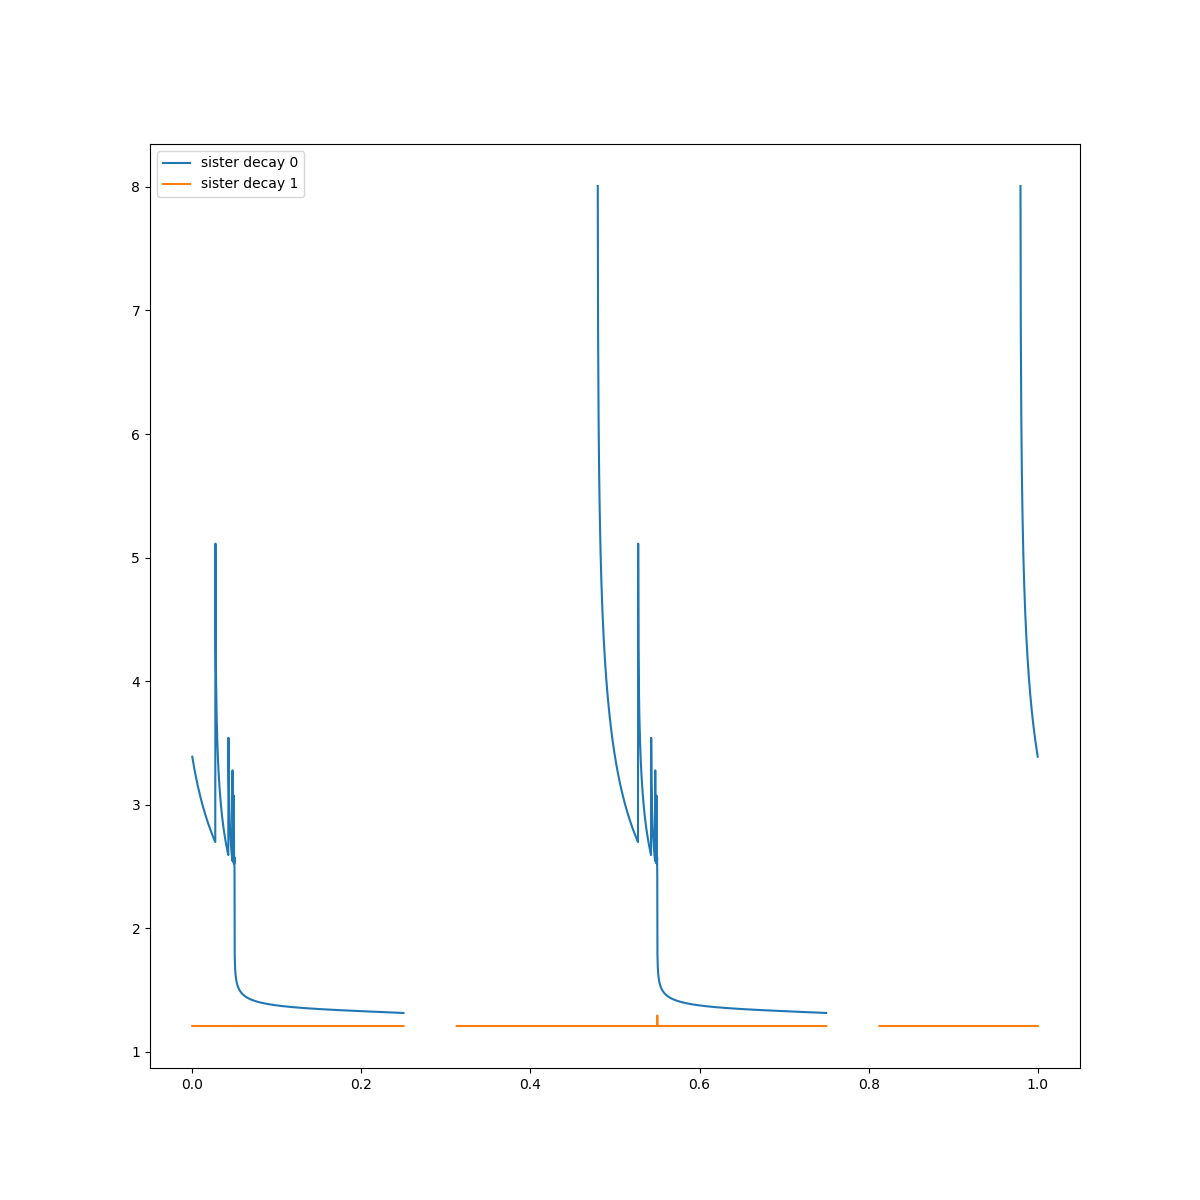

In [176]:
aaa = np.linspace(0,1,len(fitvalues))
plt.plot(aaa,fitvalues[:,0])
#plt.plot(aaa,fitvalues[:,1])
#plt.plot(aaa,fitvalues[:,2])
plt.plot(aaa,fitvalues[:,3])
#plt.plot(aaa,fitvalues[:,4])
#plt.plot(aaa,fitvalues[:,5])

plt.legend(['sister decay 0','sister decay 1', 'sister ratio', 'lineage decay 0', 'lineage decay 1', 'lineage ratio'])


<IPython.core.display.Javascript object>


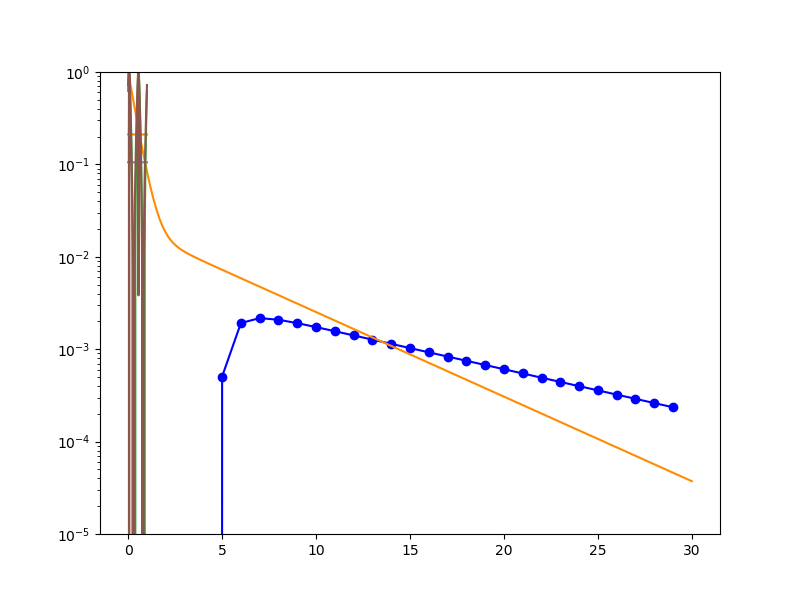

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


array([2.68079292, 0.21072103, 0.97925334,        nan,        nan,
              nan])

In [135]:
PlotCorrelation(alpha = .54, logscale = True)

In [178]:
int(False)

0